In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = '/content/drive/My Drive/Colab Notebooks/Emergency_non_emergency_vehicles'
image

'/content/drive/My Drive/Colab Notebooks/Emergency_non_emergency_vehicles'

In [ ]:
def load_img(image):
  img =[]
  for i in os.listdir(image):
    img1 = cv2.imread(os.path.join(image,i))
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img1 = cv2.resize(img1, (128,128))
    img.append(img1)

  return img


In [ ]:
img2=load_img(image)

In [ ]:
img2[1].shape

(128, 128)

In [ ]:
def get_array2(image):
    arrays = np.array(load_img(image))
    arrays = np.reshape(arrays, (arrays.shape[0], arrays.shape[1]*arrays.shape[2]))
    return arrays

In [ ]:
arrays = get_array2(image)

In [ ]:
arrays.shape

(20, 16384)

In [ ]:
Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])
X = arrays
Y.shape

(20,)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_Train.shape

(16, 16384)

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(0.90)
pca1.fit(X_Train)

PCA(n_components=0.9)

In [ ]:
print(pca1.components_.shape) #Dimensions 
# print(pca1.components_.T) 

(11, 16384)


In [ ]:
print(pca1.explained_variance_)
print(pca1.explained_variance_ratio_)

[24772995.7054017   7842627.11059861  7645096.76023129  6020645.60251433
  4792628.96557915  4028371.19147318  3814855.04703908  2830852.24486634
  2604814.38228063  2323135.53947928  2161982.62593933]
[0.32762562 0.10371961 0.10110725 0.07962371 0.06338305 0.05327566
 0.05045188 0.03743834 0.03444896 0.03072373 0.02859246]


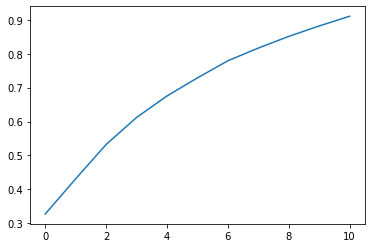

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_)) #plotting for variability of features

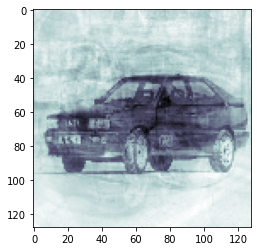

In [ ]:
plt.imshow(pca1.components_[0].reshape(128,128),cmap=plt.cm.bone)

In [ ]:
projected = pca1.fit_transform(X_Train)
projected.shape 

(16, 11)

In [ ]:
X = projected
X.shape

(16, 11)

In [ ]:
import numpy as np
y0 = np.zeros(8, dtype = bool)
y1 = np.ones(8, dtype = bool)

y = np.concatenate((y0, y1), axis = 0)
print(y)

[False False False False False False False False  True  True  True  True
  True  True  True  True]


In [ ]:
y = y.reshape((16, 1)) #(m,n_x)
y.shape

(16, 1)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix

In [ ]:
lda = LDA(n_components = 1)
lda.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=1)

In [ ]:
z = lda.transform(X)
z

array([[-0.6201706 ],
       [-0.31151847],
       [-2.1040403 ],
       [-2.16542547],
       [-2.42476005],
       [ 0.71278409],
       [-1.9613875 ],
       [-2.34010858],
       [ 1.48703892],
       [ 0.35067397],
       [ 0.87933485],
       [ 2.66620528],
       [ 2.02857742],
       [ 2.07486509],
       [ 0.81715857],
       [ 0.91077278]])

In [ ]:
y_pred = lda.predict(X)
y_pred

array([False, False, False, False, False,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_pred,y)
cm

array([[7, 0],
       [1, 8]])

In [ ]:
lda.score(X,y)

0.9375